# Predicting Customer Churn at PowerCo

This project is part of my experience at the **BCG** [Data Science](https://www.theforage.com/simulations/bcg/data-science-ccdz) job simulation program powered by **The Forage**.

<a target="_blank" href="https://colab.research.google.com/https://github.com/javier-cp6/bcg-churn-prediction/blob/main/bcg_powerco_churn_prediction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exploratory Data Analysis
---

1. Import packages
2. Load datasets
3. Descriptive statistics of data
4. Data visualization

---

## 1. Import packages

In [ ]:
# !pip install pandas-profiling

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## 2. Load datasets

In [ ]:
# Download datasets
client_data_url = "CLIENT_DATA_URL"
price_data_url = "PRICE_DATA_URL"

!mkdir /content/data
!wget -q --show-progress -O /content/data/client_data.csv $client_data_url
!wget -q --show-progress -O /content/data/price_data.csv $price_data_url

In [ ]:
client_df = pd.read_csv('/content/data/client_data.csv')
price_df = pd.read_csv('/content/data/price_data.csv')

In [ ]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [ ]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## 3. Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [ ]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets.

In [ ]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [ ]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Pandas profiling

[pandas-profiling](https://docs.profiling.ydata.ai/latest/) is a great time-saving tool for a fast EDA. Nevertheless, in section 4, we develop a tailored data visualization.

In [ ]:
# import pandas as pd
# from ydata_profiling import ProfileReport

In [ ]:
# client_profile = ProfileReport(client_df, title="Client Profiling Report")
# price_profile = ProfileReport(price_df, title="Price Profiling Report")

In [ ]:
# client_profile.to_file('/content/client_profile.html')
# price_profile.to_file('/content/price_profile.html')

In [ ]:
# client_profile

In [ ]:
# price_profile

---

## 4. Data visualization

In [ ]:
def plot_stacked_bars(df, title_, size_=(18, 10), rot_=0, legend_="upper right"):
  """
  Plot stacked bars with annotations.
  """
  ax = df.plot(
      kind="bar",
      stacked=True,
      figsize=size_,
      rot=rot_,
      title=title_,
      alpha=0.7
  )

  annotate_stacked_bars(ax, textsize=10)
  plt.legend(["Retention", "Churn"], loc=legend_)
  plt.ylabel("Company base (%)")
  plt.show()


def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
  """
  Add value annotations to the bars.
  """
  # Iterate over the plotted rectangles/bars
  for p in ax.patches:
    # Calculate annotation
    value = str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value == '0.0':
        continue
    ax.annotate(
        value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
        color=colour,
        size=textsize
    )


def plot_histogram(df, column_name, ax, bins_=50):
  """
  Plot variable distribution of a numeric column in a stacked histogram of \n
  churned and retained customers.
  """
  churn_0_data = df[df['churn'] == 0][column_name]
  churn_1_data = df[df['churn'] == 1][column_name]

  # Plot stacked histograms
  ax.hist([churn_0_data, churn_1_data], bins=bins_, alpha=0.7,
          label=['Retention', 'Churn'], stacked=True)

  ax.set_xlabel(column_name)
  ax.set_ylabel('Freq.')
  ax.legend()


def plot_hist_subplots(df, columns, title, figsize=(9, 4)):
  """
  Plot histogram subplots for a list of columns.
  """
  num_rows = (len(columns) + 1) // 2
  num_cols = 2

  fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9, num_rows*2))

  axs_flat = axs.flatten()

  for i, col_name in enumerate(columns):
      plot_histogram(df, col_name, axs_flat[i])

  fig.suptitle(title, fontsize=14)

  # Remove the last empty subplot
  if len(axs_flat) > len(columns):
      fig.delaxes(axs_flat[-1])

  plt.tight_layout()
  plt.show()

### Churning status

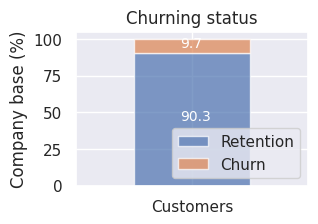

In [ ]:
# Plot churning status
churn = client_df[['id', 'churn']]
churn.columns = ['Customers', 'churn']
churn_total = churn.groupby('churn').count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(),
                  "Churning status", (3, 2), legend_="lower right")

*We will need to address the imbalance of the data, where churned customers represent the minority class, accounting for only 9.7% of the records.*

### Missing values

Review columns containing zero values.

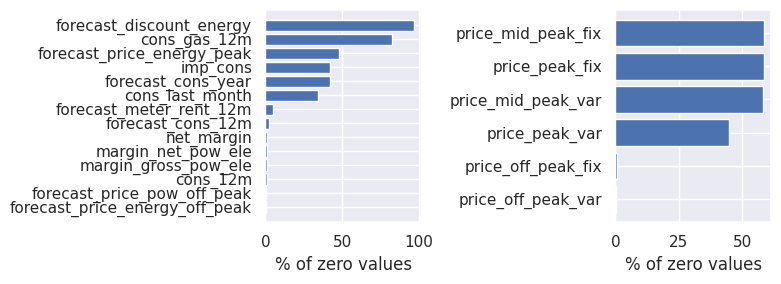

In [ ]:
# Plot percentage of zero values in columns
datasets = [client_df.drop(columns='churn'), price_df]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs_flat = axs.flatten()

for i, df in enumerate(datasets):
  df_zero_cols = df.columns[(df == 0).any()]
  df_zero_values_pct = round(
      (df[df_zero_cols] == 0).sum() / df.shape[0] * 100, 2
  ).sort_values()

  axs_flat[i].barh(y=df_zero_values_pct.index, width=df_zero_values_pct)
  axs_flat[i].set_xlabel('% of zero values')

plt.tight_layout()
plt.show()

### Gas contracts

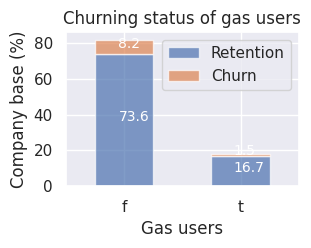

In [ ]:
# Plot churning status of gas contracts
churn_gas = client_df[['has_gas', 'churn']]
churn_gas.columns = ['Gas users', 'churn']
churn_gas_total = churn_gas.groupby('Gas users').value_counts()
churn_gas_percentage = churn_gas_total / churn_gas_total.sum() * 100
plot_stacked_bars(churn_gas_percentage.unstack(),
                  "Churning status of gas users", (3, 2), legend_="upper right")

### Sales

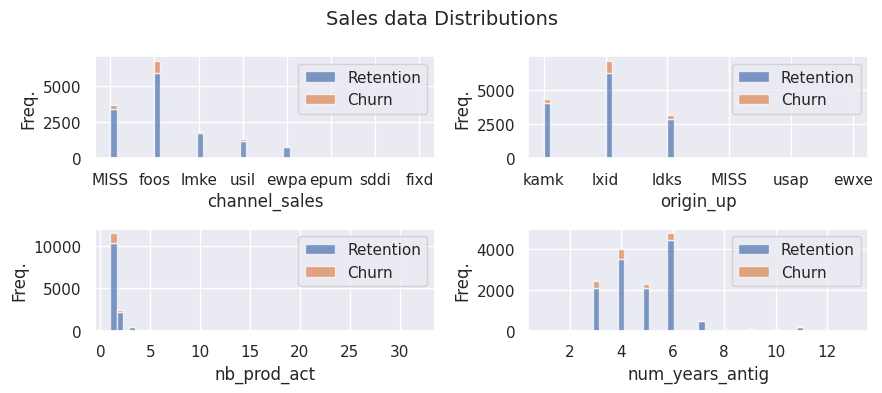

In [ ]:
# Truncate channels' names
client_df[['channel_sales', 'origin_up']] = client_df[['channel_sales', 'origin_up']].apply(lambda x: x.str.slice(0, 4))

# Plot sales-related data
contract_cols = ['channel_sales', 'origin_up', 'nb_prod_act', 'num_years_antig']
plot_hist_subplots(client_df, contract_cols, 'Sales data Distributions')

### Electricity consumption

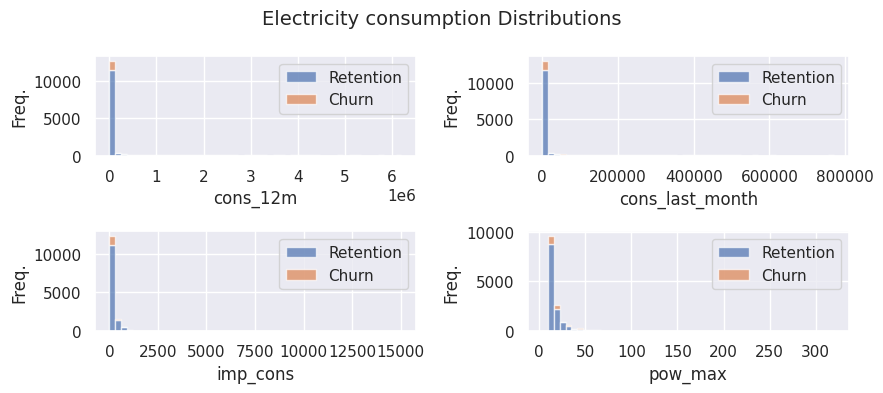

In [ ]:
# Plot electricity consumption data
consumption_columns = ['cons_12m', 'cons_last_month', 'imp_cons', 'pow_max']
plot_hist_subplots(client_df, consumption_columns,
                   'Electricity consumption Distributions')

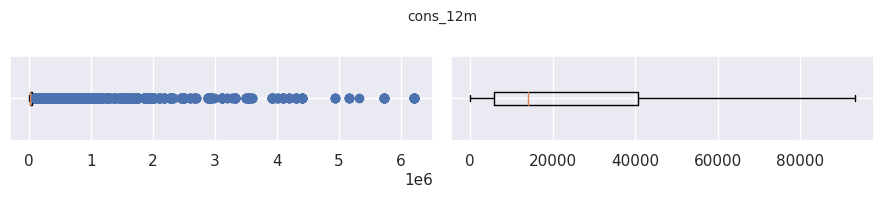

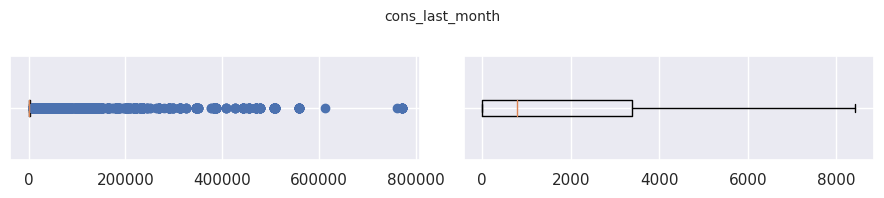

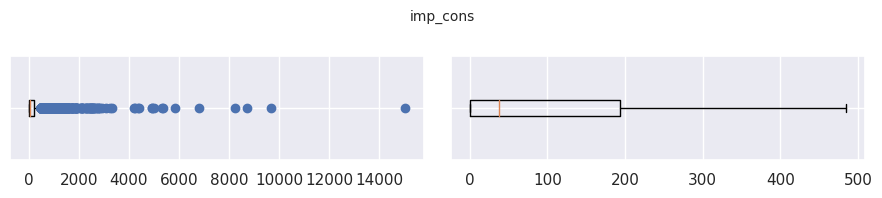

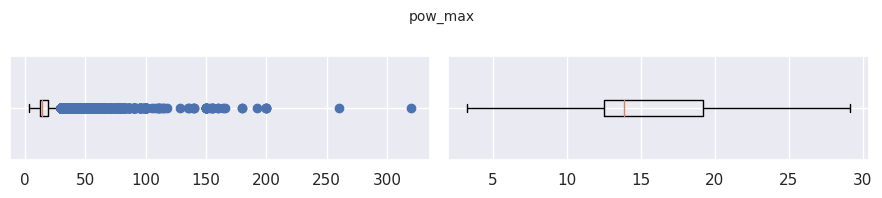

In [ ]:
# Boxplots for electricity consumption
for i, col_name in enumerate(consumption_columns):
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 2))

  axs[0].boxplot(client_df[col_name], sym='b', vert=False)
  axs[1].boxplot(client_df[col_name], sym='', vert=False)

  fig.suptitle(col_name, fontsize=10)
  plt.setp(axs, yticklabels='')

  plt.tight_layout()
  plt.show()

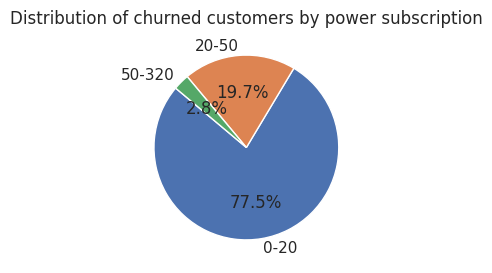

In [ ]:
# Plot distribution of churned customers according to their power subscription
pow_max_values = client_df.loc[client_df['churn'] == 1, 'pow_max']

bins = [0, 20, 50, 320]

plt.figure(figsize=(3, 3))
plt.pie(
    pow_max_values.groupby(pd.cut(pow_max_values, bins=bins))
    .count(),
    labels=['0-20', '20-50', '50-320'],
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Distribution of churned customers by power subscription')
plt.show()

*Churned customers with a power subscription lower than 20 (kW) account for 77% of the total.*

### Electrity consumption forecasts

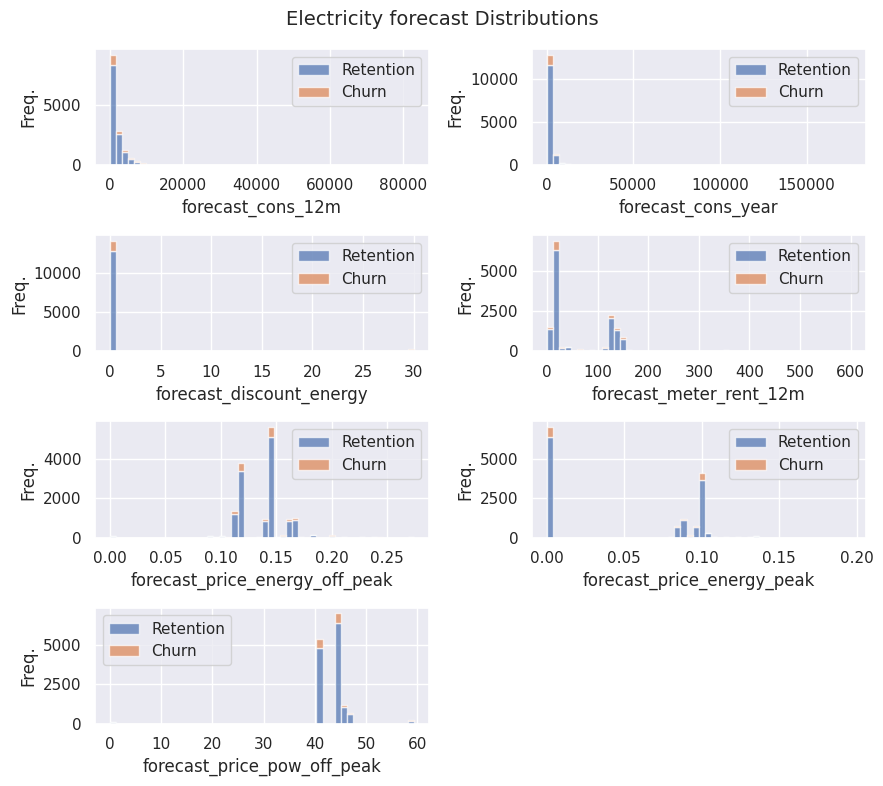

In [ ]:
# Plot electricity consumption forecasts
forecast_cols = [
    'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 'forecast_price_pow_off_peak'
    ]
plot_hist_subplots(client_df, forecast_cols,
                   'Electricity forecast Distributions')

### Gas consumption

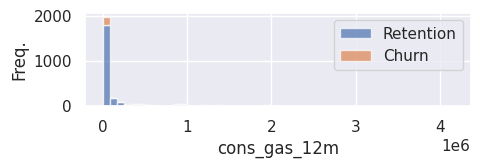

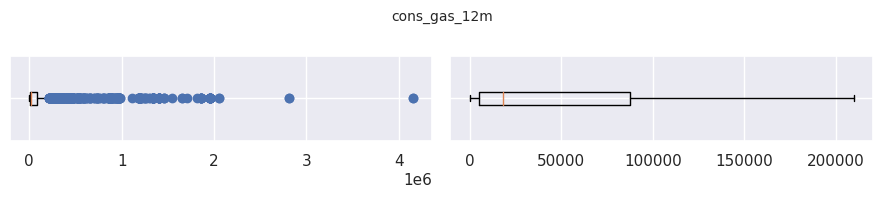

In [ ]:
# Plot gas consumption
gas_clients_df = client_df[client_df['has_gas']=='t']
plot_hist_subplots(gas_clients_df, ['cons_gas_12m'], None)


# Boxplots for gas consumption
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 2))

axs[0].boxplot(gas_clients_df['cons_gas_12m'], sym='b', vert=False)
axs[1].boxplot(gas_clients_df['cons_gas_12m'], sym='', vert=False)

fig.suptitle('cons_gas_12m', fontsize=10)
plt.setp(axs, yticklabels='')
plt.tight_layout()
plt.show()


### Margin

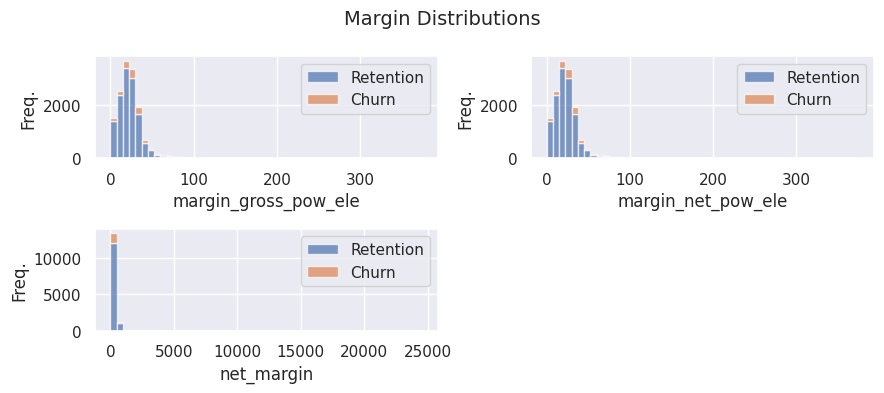

In [ ]:
# Plot electricity consumption forecasts
margin_cols = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']
plot_hist_subplots(client_df, margin_cols,
                   'Margin Distributions')

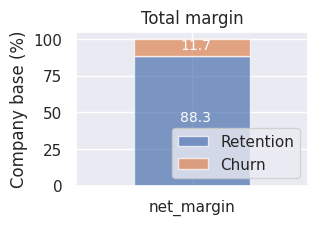

In [ ]:
# Plot net margin status
net_margin = client_df[['churn', 'net_margin']]
net_margin_total = net_margin.groupby('churn').sum()
net_margin_pct = (net_margin_total / net_margin_total.sum() * 100)
plot_stacked_bars(net_margin_pct.transpose(),
                  "Total margin", (3, 2), legend_="lower right")

### Time-related data

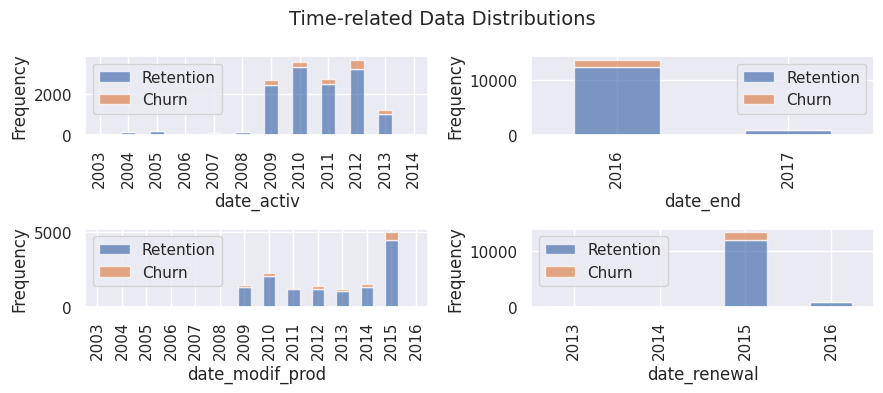

In [ ]:
# Plot time-related data
time_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 4))
axs_flat = axes.flatten()

for i, col in enumerate(time_cols):
  client_df.groupby(pd.to_datetime(client_df[col]).dt.year)['churn'] \
  .value_counts().unstack() \
  .plot(kind='bar', stacked=True, ax=axs_flat[i], alpha=0.7)
  axs_flat[i].set_ylabel('Frequency')
  axs_flat[i].legend(["Retention", "Churn"])

fig.suptitle('Time-related Data Distributions', fontsize=14)

plt.tight_layout()
plt.show()

### Electricity pricing

In [ ]:
# Update date data type
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

In [ ]:
print('Earliest record from:', price_df['price_date'].min())
print('Latest record from:', price_df['price_date'].max())

print("Min num of months:", price_df.groupby(['id'])['price_date'].size().min())
print("Max num of months:", price_df.groupby(['id'])['price_date'].size().max())

Earliest record from: 2015-01-01 00:00:00
Latest record from: 2015-12-01 00:00:00
Min num of months: 7
Max num of months: 12


*The price dataset includes up to 12 monthly records per customer from 2015.*

In [ ]:
# Add churn column to the price dataset
temp_df = price_df.merge(client_df[['id', 'churn']], how='left', on='id')

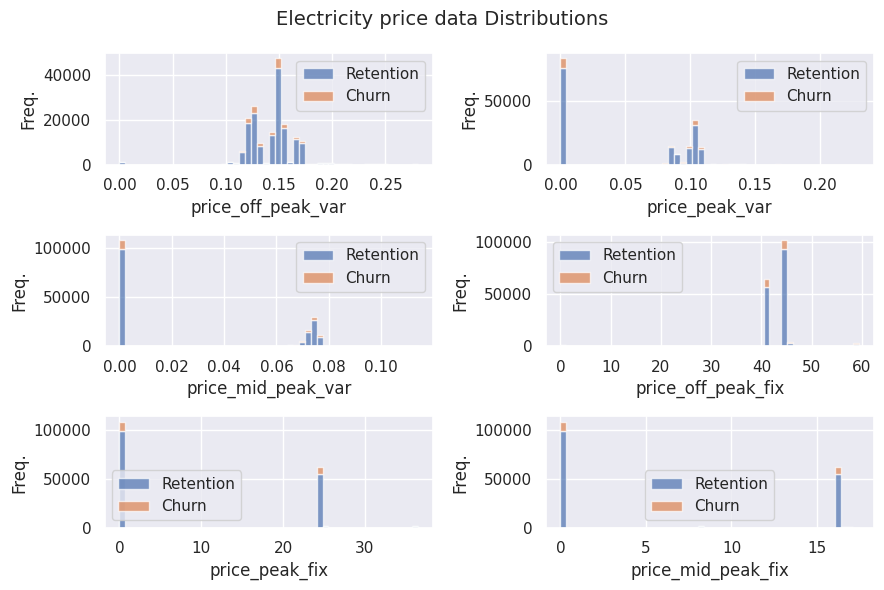

In [ ]:
# Plot electricity price distributions
price_cols = ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']
plot_hist_subplots(temp_df, price_cols,
                   'Electricity price data Distributions')

*Within the price dataset (price_df), the off-peak prices exhibit comprehensive data, while the majority of values corresponding to peak and mid-peak prices are registered as zero.*

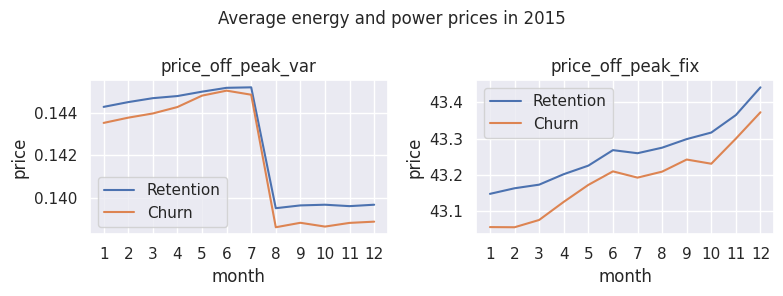

In [ ]:
# Plot average monthly prices for energy and power
price_cols = ['price_off_peak_var', 'price_off_peak_fix']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs_flat = axs.flatten()

churn_classes = [0, 1]

for i, col in enumerate(price_cols):
  for churn_class in churn_classes:
    # Remove zeros from prices
    churn_data = temp_df[
        (temp_df['churn'] == churn_class) &
        (temp_df[col] > 0)
    ]
    monthly_mean = churn_data[col].groupby(churn_data['price_date'].dt.month).mean()
    axs_flat[i].plot(monthly_mean)

  axs_flat[i].set_title(col)
  axs_flat[i].set_xlabel('month')
  axs_flat[i].set_ylabel('price')
  axs_flat[i].legend(['Retention', 'Churn'])

  axs_flat[i].set_xticks(range(1, len(monthly_mean) + 1))

fig.suptitle('Average energy and power prices in 2015', fontsize=12)

plt.tight_layout()
plt.show()

*On average, churned customers have slightly lower off-peak energy and power prices.*

# Feature engineering
---

1. Load datasets
2. Clean datasets
3. Add new features
4. Correlation analysis

## 1. Load datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes=True)

In [2]:
# Download datasets
client_data_url = "CLIENT_DATA_URL"
price_data_url = "PRICE_DATA_URL"

!mkdir /content/data
!wget -q --show-progress -O /content/data/client_data.csv $client_data_url
!wget -q --show-progress -O /content/data/price_data.csv $price_data_url

In [4]:
# Load datasets
client_df = pd.read_csv('/content/data/client_data.csv')
price_df = pd.read_csv('/content/data/price_data.csv')

Update date data types

In [5]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

## 2. Clean datasets

Remove columns with more than 25% zero values in the client dataset.

In [6]:
client_df_drop_cols = [
  'forecast_price_energy_peak',
  'forecast_cons_year',
  'cons_last_month',

  'forecast_discount_energy',
  'imp_cons',
]

client_df = client_df.drop(columns=client_df_drop_cols)

Remove duplicated columns `margin_net_pow_ele` and `margin_gross_pow_ele`

In [7]:
# Calculate percentage of duplicated values between msrgin columns
margin_diffs = (
    client_df['margin_net_pow_ele'] - client_df['margin_gross_pow_ele']
)

round((margin_diffs == 0).sum() / client_df.shape[0] * 100, 2)

99.99

In [8]:
# Remove dulicated column
client_df = client_df.drop(columns='margin_gross_pow_ele')

Exclude rows containing zeros in columns with less than 2% of missing values.

In [9]:
cols_with_zeros = [
  'margin_net_pow_ele',
  'net_margin',
  'forecast_price_energy_off_peak',
  'forecast_price_pow_off_peak',

  'cons_12m',
  'forecast_cons_12m',
]

client_df = client_df[(client_df[cols_with_zeros] != 0).all(axis=1)]

Remove columns for peak and mid-peak prices since the majority of their values are zeros.

In [10]:
price_df = price_df[['id', 'price_date', 'price_off_peak_var', 'price_off_peak_fix']]

Imputate missing prices

In [11]:
# Imputate missing prices with the previous or the next monthly price
price_df = price_df.sort_values(['id', 'price_date'])

price_cols = ['price_off_peak_var', 'price_off_peak_fix']

for col in price_cols:
  price_df.loc[price_df[col] == 0, col] = pd.NA
  price_df[col] = price_df.groupby('id')[col].fillna(method='ffill')
  price_df[col] = price_df.groupby('id')[col].fillna(method='bfill')

# Remove remaining ids with missing values
price_df = price_df.dropna()

## 3. Add new features

In [12]:
# Create a df to save new features from the price dataset
price_df_feat = pd.DataFrame(price_df['id'].unique(), columns=['id'])

### 3.1 Variances

Calculate the variances in off-peak prices
for energy and power.



In [13]:
# Calculate variances in the last year
var_1y = price_df.groupby('id')[price_cols].var()
var_1y.columns = ['var_1y_' + col_name for col_name in var_1y.columns]
price_df_feat = price_df_feat.merge(var_1y, on='id')

# Calculate variances in the last semester
var_6m = price_df[price_df['price_date'].dt.month > 6].groupby('id')[price_cols].var()
var_6m.columns = ['var_6m_' + col_name for col_name in var_6m.columns]
price_df_feat = price_df_feat.merge(var_6m, on='id')

### 3.2 Average off-peak prices

In [14]:
# Calculate mean, min and max prices for energy
price_df_feat['price_off_peak_var_mean'] = (
    price_df.groupby('id')['price_off_peak_var'].mean().values
)

# Calculate mean, min and max prices for power
price_df_feat['price_off_peak_fix_mean'] = (
    price_df.groupby('id')['price_off_peak_fix'].mean().values
)

### 3.3 Price differences from January to December

Calculate the difference between the off-peak prices in December (latest) and January (earliest).

In [15]:
price_offpeak_cols = ['price_off_peak_var', 'price_off_peak_fix']

earliest_records = price_df.groupby(['id']).first()[price_offpeak_cols]
latest_records = price_df.groupby(['id']).last()[price_offpeak_cols]

# Calculate price differences
diff_dec_jan = (latest_records - earliest_records).reset_index()

diff_dec_jan.columns = [
    'id',
    'price_offpeak_diff_dec_jan_var',
    'price_offpeak_diff_dec_jan_fix'
]

price_df_feat = price_df_feat.merge(diff_dec_jan, on='id')

### 3.4 Add new features to the cleaned dataset

In [16]:
# Create a cleaned dataset
df = client_df.merge(price_df_feat, how='inner', on='id')

### 3.5 Convert dates to numerical data

Add features by transforming dates to elapsed time in years.


In [17]:
# Update date data types
date_cols = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal',
]

for col in date_cols:
  df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [18]:
def calculate_time_diff(latest_date_df, earliest_date_df, unit="Y"):
    time_diff = latest_date_df - earliest_date_df
    months = time_diff // np.timedelta64(1, unit)
    return months

In [19]:
# Calculate customer tenure in years
df['num_years_tenure'] = calculate_time_diff(df['date_end'], df['date_activ'])

# Calculate time from activation to the last modification
df['num_years_mod_activ'] = np.maximum(
    calculate_time_diff(df['date_modif_prod'], df['date_activ']), 0
)

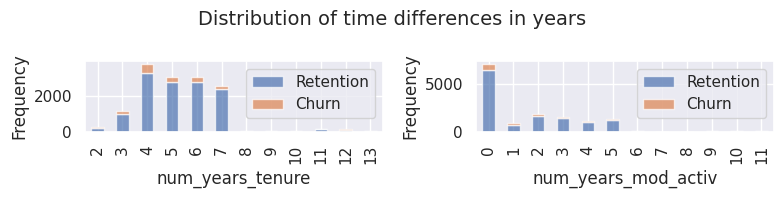

In [20]:
time_diff_cols = [
    'num_years_tenure',
    'num_years_mod_activ',
]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))

axs_flat = axes.flatten()

for i, col in enumerate(time_diff_cols):
  df.groupby(col)['churn'].value_counts() \
    .unstack() \
    .plot(kind='bar', stacked=True, ax=axs_flat[i], alpha=0.7)

  axs_flat[i].set_ylabel('Frequency')
  axs_flat[i].legend(["Retention", "Churn"])

fig.suptitle('Distribution of time differences in years', fontsize=14)

plt.tight_layout()
plt.show()

In [21]:
# Drop date columns
df = df.drop(columns=date_cols)

### 3.6 Numerical feature transformation

As seen in the EDA, some features are skewed, then we apply logarithmic transformation to reduce skewness.

In [22]:
def plot_stacked_bars(df, title_, size_=(18, 10), rot_=0, legend_="upper right"):
  """
  Plot stacked bars with annotations.
  """
  ax = df.plot(
      kind="bar",
      stacked=True,
      figsize=size_,
      rot=rot_,
      title=title_,
      alpha=0.7
  )

  annotate_stacked_bars(ax, textsize=10)
  plt.legend(["Retention", "Churn"], loc=legend_)
  plt.ylabel("Company base (%)")
  plt.show()


def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
  """
  Add value annotations to the bars.
  """
  # Iterate over the plotted rectangles/bars
  for p in ax.patches:
    # Calculate annotation
    value = str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value == '0.0':
        continue
    ax.annotate(
        value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
        color=colour,
        size=textsize
    )


def plot_histogram(df, column_name, ax, bins_=50):
  """
  Plot variable distribution of a numeric column in a stacked histogram of \n
  churned and retained customers.
  """
  churn_0_data = df[df['churn'] == 0][column_name]
  churn_1_data = df[df['churn'] == 1][column_name]

  # Plot stacked histograms
  ax.hist([churn_0_data, churn_1_data], bins=bins_, alpha=0.7,
          label=['Retention', 'Churn'], stacked=True)

  ax.set_xlabel(column_name)
  ax.set_ylabel('Freq.')
  ax.legend()


def plot_hist_subplots(df, columns, title, figsize=(9, 4)):
  """
  Plot histogram subplots for a list of columns.
  """
  num_rows = (len(columns) + 1) // 2
  num_cols = 2

  fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9, num_rows*2))

  axs_flat = axs.flatten()

  for i, col_name in enumerate(columns):
      plot_histogram(df, col_name, axs_flat[i])

  fig.suptitle(title, fontsize=14)

  # Remove the last empty subplot
  if len(axs_flat) > len(columns):
      fig.delaxes(axs_flat[-1])

  plt.tight_layout()
  plt.show()

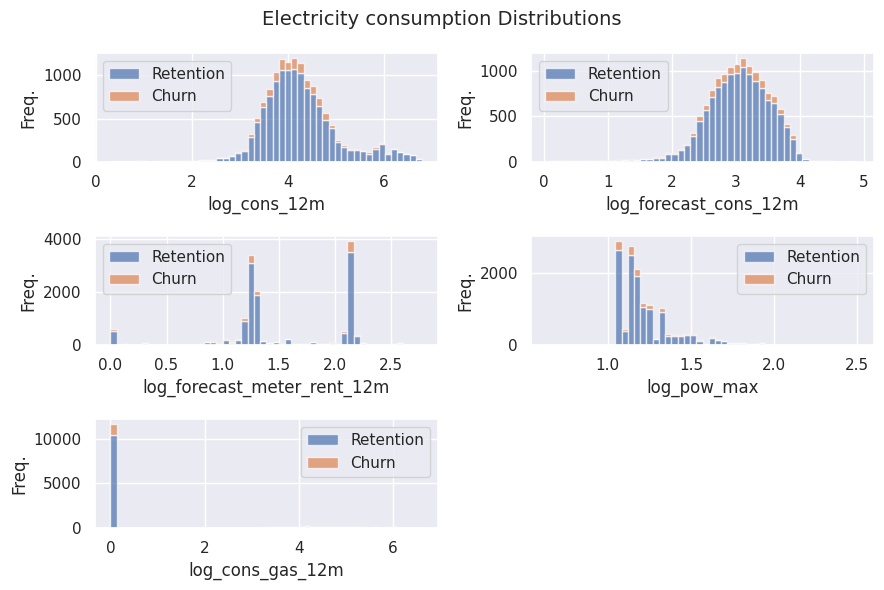

In [23]:
skewed_cols_cons = [
    'cons_12m',
    'forecast_cons_12m',
    'forecast_meter_rent_12m',
    'pow_max',
    'cons_gas_12m',
]

for col in skewed_cols_cons:
  df['log_' + col] = np.log10(df[col] + 1)

log_skewed_cols_cons = ['log_' + prefix for prefix in skewed_cols_cons]
plot_hist_subplots(df, log_skewed_cols_cons,
                   'Electricity consumption Distributions')

plt.show()

df = df.drop(columns=skewed_cols_cons)

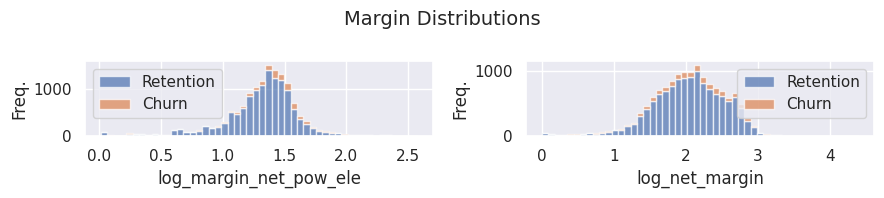

In [24]:
skewed_cols_margin = [
    'margin_net_pow_ele',
    'net_margin',
]

for col in skewed_cols_margin:
  df['log_' + col] = np.log10(df[col] + 1)

log_skewed_cols_margin = ['log_' + prefix for prefix in skewed_cols_margin]
plot_hist_subplots(df, log_skewed_cols_margin,
                   'Margin Distributions')

plt.show()

df = df.drop(columns=skewed_cols_margin)

### 3.7 Binning

Transform categorical values to binary features.

In [25]:
df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})

### 3.8 One-hot encoding

Transform categories into dummy variables, retaining only the most relevant ones.

In this section, we just impute infrequent categories. As we will transform the training data into a dictionary using `DictVectorizer`, there is no explicit need for one-hot encoding using the `get_dummies` method.

**Sales channels**

In [26]:
df['channel_sales'] = df['channel_sales'].astype('category')
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6632
MISSING                             3472
lmkebamcaaclubfxadlmueccxoimlema    1783
usilxuppasemubllopkaafesmlibmsdf    1359
ewpakwlliwisiwduibdlfmalxowmwpci     876
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [27]:
# Threshold for category frequency
threshold = 100

channel_sales_counts = df['channel_sales'].value_counts()
low_freq_channels = channel_sales_counts[channel_sales_counts < threshold].index

# Replace infrequent sales channels with 'Other'
df['channel_sales'] = df['channel_sales'].replace(low_freq_channels, 'Other')

**Electricity campaigns**

In [28]:
df['origin_up'] = df['origin_up'].astype('category')
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    6884
kamkkxfxxuwbdslkwifmmcsiusiuosws    4224
ldkssxwpmemidmecebumciepifcamkci    2967
MISSING                               60
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [29]:
origin_up_counts = df['origin_up'].value_counts()
low_freq_origin_up = origin_up_counts[origin_up_counts < threshold].index

# Replace infrequent campaigns with 'Other'
df['origin_up'] = df['origin_up'].replace(low_freq_origin_up, 'Other')

## 4. Correlation analysis

Corelation with `churn`.

In [30]:
corr = df.select_dtypes(['int64', 'float64']).corrwith(df['churn']).abs()
corr.sort_values(ascending=False)[0:15]

churn                             1.000000
log_margin_net_pow_ele            0.090217
num_years_antig                   0.067459
num_years_tenure                  0.064901
var_6m_price_off_peak_fix         0.036366
log_pow_max                       0.036252
log_forecast_meter_rent_12m       0.035790
var_1y_price_off_peak_fix         0.029178
var_6m_price_off_peak_var         0.027146
var_1y_price_off_peak_var         0.025884
log_cons_gas_12m                  0.023714
forecast_price_energy_off_peak    0.023296
has_gas                           0.022633
log_cons_12m                      0.021900
price_off_peak_var_mean           0.021768
dtype: float64

Plot correlations

<ipython-input-31-337481758135>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


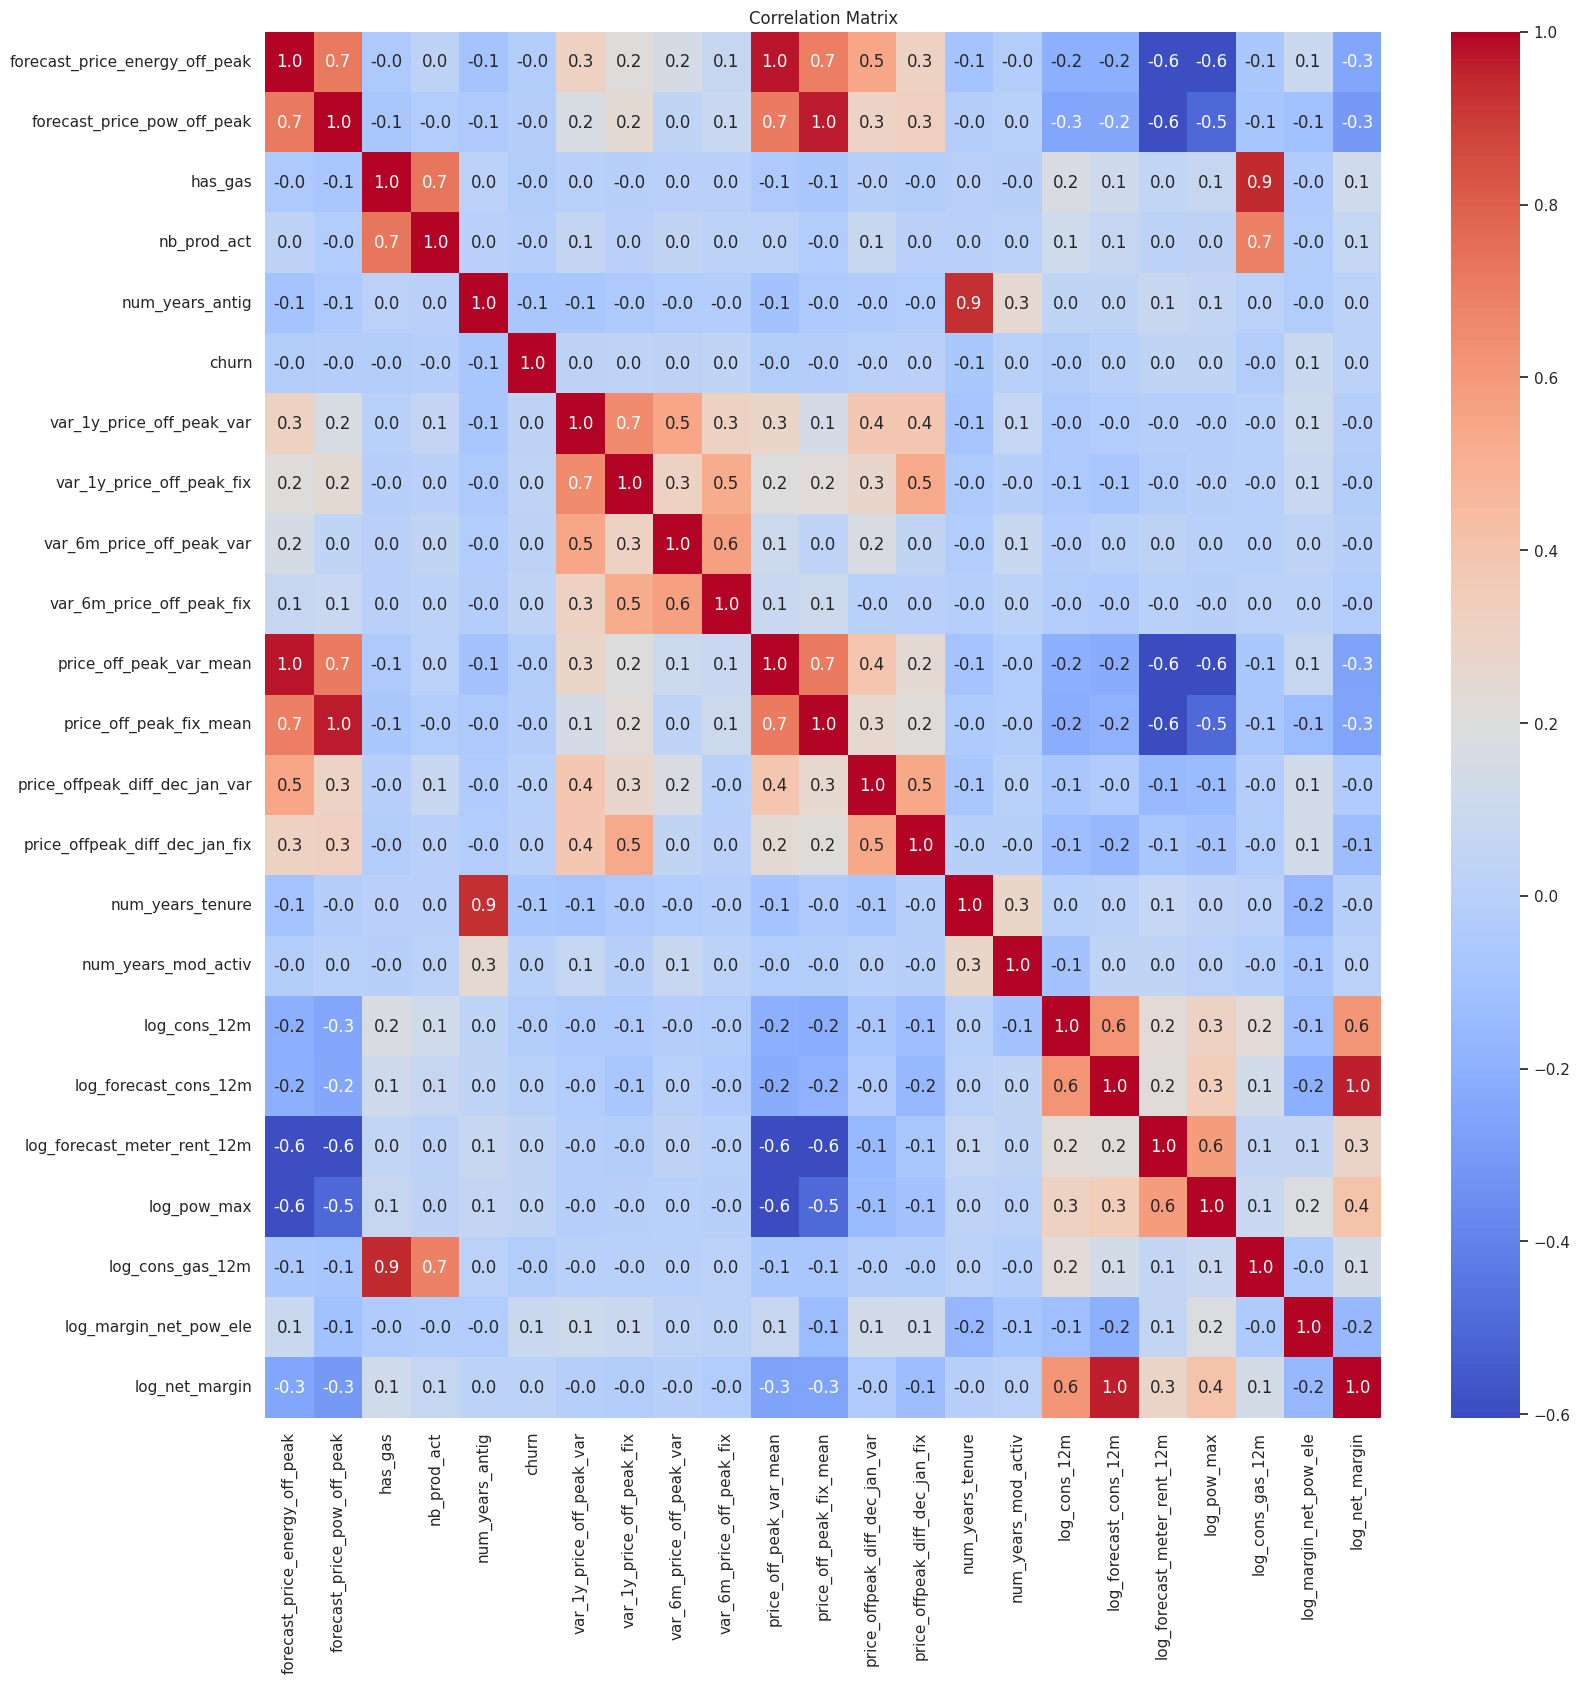

In [31]:
correlation_matrix = df.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

In [32]:
# Remove correlated columns
cols_drop = [
  'forecast_price_energy_off_peak',
  'forecast_price_pow_off_peak',
  'nb_prod_act',
  'num_years_antig',
  'log_forecast_cons_12m',
  'log_forecast_meter_rent_12m',
  'log_cons_gas_12m',
  'log_net_margin',
  'var_1y_price_off_peak_var',
  'var_1y_price_off_peak_fix',
  'var_6m_price_off_peak_fix',
  'price_off_peak_var_mean',
  'price_off_peak_fix_mean',
  'price_offpeak_diff_dec_jan_var',
]

df = df.drop(columns=cols_drop)

<ipython-input-33-813d0e355436>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


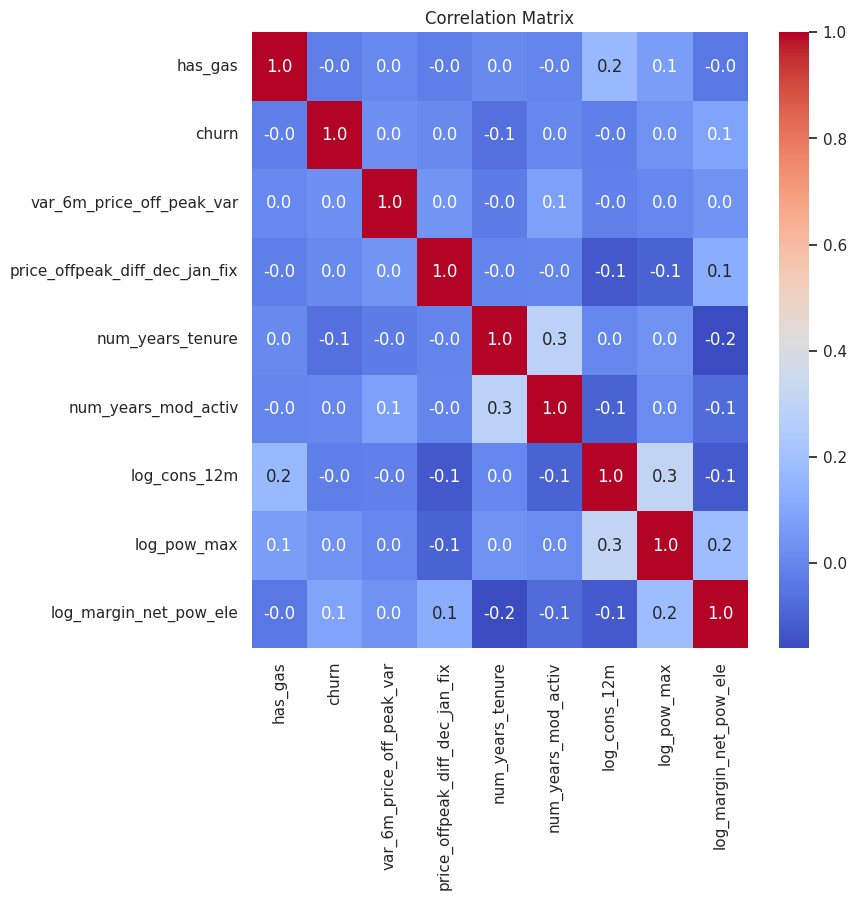

In [33]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

Save the cleaned dataset

In [34]:
cleaned_df_path = "/content/data/clean_data.csv"
df.to_csv(cleaned_df_path)

# Modeling
---

1. Data preparation
2. Training with Random Forest
3. Handling imbalanced data
4. Hyperparameter tuning
5. Evaluation
6. Feature importance analysis
7. Training with XGBoost

In [1]:
# !pip install shap
# !pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

# import shap

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

In [3]:
# Load datasets
df = pd.read_csv('/content/data/clean_data.csv')

## 1. Data preparation

In [4]:
# Prepare data
df = df.drop(columns=['Unnamed: 0', 'id'])

In [5]:
# Categories
category_cols = ['channel_sales', 'origin_up']

for col in category_cols:
  df[col] = df[col].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14138 entries, 0 to 14137
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   channel_sales                   14138 non-null  category
 1   has_gas                         14138 non-null  int64   
 2   origin_up                       14138 non-null  category
 3   churn                           14138 non-null  int64   
 4   var_6m_price_off_peak_var       14138 non-null  float64 
 5   price_offpeak_diff_dec_jan_fix  14138 non-null  float64 
 6   num_years_tenure                14138 non-null  int64   
 7   num_years_mod_activ             14138 non-null  int64   
 8   log_cons_12m                    14138 non-null  float64 
 9   log_pow_max                     14138 non-null  float64 
 10  log_margin_net_pow_ele          14138 non-null  float64 
dtypes: category(2), float64(5), int64(4)
memory usage: 1022.2 KB


In [7]:
# Split data into train, validation, and test sets (60-20-20 ratio)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [8]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [9]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [10]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [11]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(8482, 10)
(2828, 10)
(2828, 10)


Transform datasets into dictionaries

In [12]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

## 2. Training with Random Forest

### 2.1 Random forest: Training with default hyperparameters

In [13]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 2.2 Evaluation

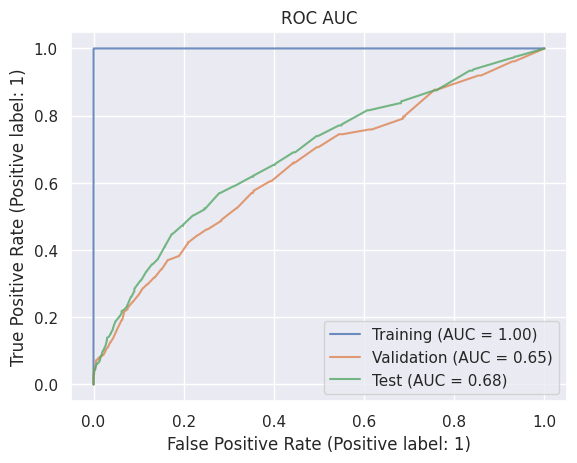

In [14]:
# Plot ROC AUC
ax = plt.gca()
rf_disp_train = RocCurveDisplay.from_estimator(
    rf, X_train, y_train, ax=ax, alpha=0.8, name='Training'
)
rf_disp_val = RocCurveDisplay.from_estimator(
    rf, X_val, y_val, ax=ax, alpha=0.8, name='Validation'
)
rf_disp_test = RocCurveDisplay.from_estimator(
    rf, X_test, y_test, ax=ax, alpha=0.8, name='Test'
)

plt.title("ROC AUC")
plt.show()

*The ROC AUC score of 1 on the training set indicates that the model is overfitted.*

In [15]:
# Make churn predictions on test data
y_preds_test = rf.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_preds_test).ravel()

# Confusion matrix
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, y_preds_test)}")
print(f"Precision: {metrics.precision_score(y_test, y_preds_test)}")
print(f"Recall: {metrics.recall_score(y_test, y_preds_test)}")

True positives: 14
False positives: 11
True negatives: 2529
False negatives: 274

Accuracy: 0.8992220650636492
Precision: 0.56
Recall: 0.04861111111111111


*The recall is very poor, being less than 5%.*

## 3. Handling imbalanced data

In [16]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [17]:
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

print(sorted(Counter(y_train).items()))

[(0, 7687), (1, 7687)]


## 4. Hyperparameter tuning

*We aim for the model to predict churned customers, and we can tolerate some instances where non-churned customers are incorrectly predicted as churned. Consequently, we will tune the model to improve the recall score.*

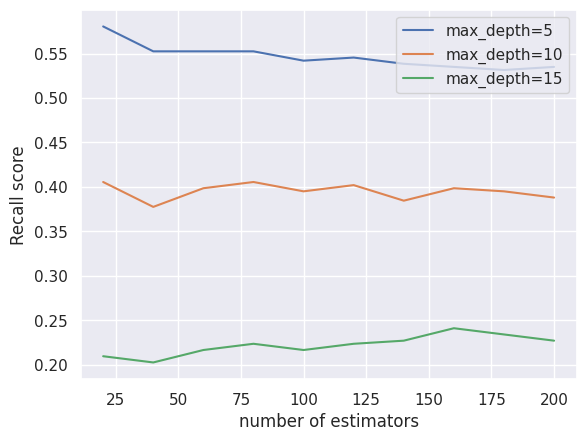

In [18]:
# Training models with different values of max_depth
scores = []

for d in [5, 10, 15]:
    for n in range(20, 201, 20):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=42)

        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        recall_val = metrics.recall_score(y_val, y_pred)

        scores.append((d, n, recall_val))

# Plot results
columns = ['max_depth', 'n_estimators', 'recall_val']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.recall_val,
             label='max_depth=%d' % d)
    plt.xlabel("number of estimators")
    plt.ylabel("Recall score")

plt.legend()
plt.show()

*Best recall at max_depth=5.*

In [19]:
max_depth = 5

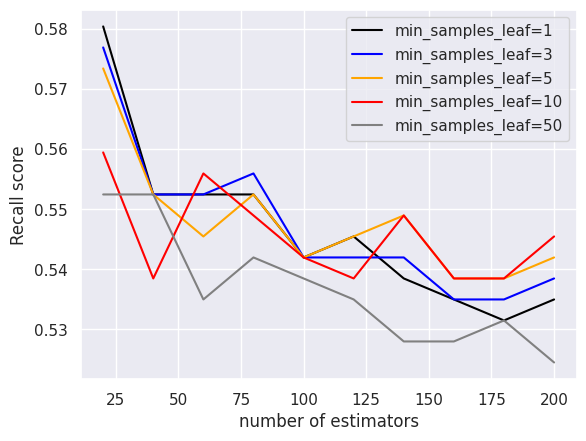

In [20]:
# Training models with different values of min_samples_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(20, 201, 20):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=42)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        recall_val = metrics.recall_score(y_val, y_pred)

        scores.append((s, n, recall_val))

# plot results
columns = ['min_samples_leaf', 'n_estimators', 'recall_val']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.recall_val,
             color=col,
             label='min_samples_leaf=%d' % s)
    plt.xlabel("number of estimators")
    plt.ylabel("Recall score")

plt.legend()

*Best recall at min_samples_leaf=1.*

In [21]:
min_samples_leaf = 1

Training final random forest model with best hyperparameters.

In [22]:
rf = RandomForestClassifier(n_estimators=20,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)

## 5. Evaluation

Evaluate the model on ROC AUC and recall scores.

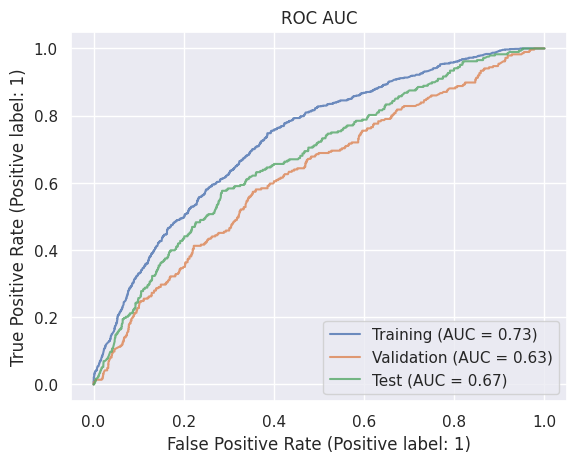

In [23]:
# Plot ROC AUC
ax = plt.gca()
rf_disp_train = RocCurveDisplay.from_estimator(
    rf, X_train, y_train, ax=ax, alpha=0.8, name='Training'
)
rf_disp_val = RocCurveDisplay.from_estimator(
    rf, X_val, y_val, ax=ax, alpha=0.8, name='Validation'
)
rf_disp_test = RocCurveDisplay.from_estimator(
    rf, X_test, y_test, ax=ax, alpha=0.8, name='Test'
)

plt.title("ROC AUC")
plt.show()

In [24]:
y_preds_prob_test = rf.predict_proba(X_test)[:, 1]

roc_auc_test = roc_auc_score(y_test, y_preds_prob_test)
print("ROC AUC Score - Test:", roc_auc_test)

ROC AUC Score - Test: 0.6732406496062993


In [25]:
# Make churn predictions on test data
y_preds_test = rf.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_preds_test).ravel()

# Confusion matrix
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, y_preds_test)}")
print(f"Precision: {metrics.precision_score(y_test, y_preds_test)}")
print(f"Recall: {metrics.recall_score(y_test, y_preds_test)}")

True positives: 174
False positives: 855
True negatives: 1685
False negatives: 114

Accuracy: 0.6573550212164073
Precision: 0.16909620991253643
Recall: 0.6041666666666666


### 5.1 Cross-validation

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [31]:
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Perform cross-validation and obtain accuracy scores
cv_auc_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='roc_auc')
cv_recall_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

cv_auc_mean = np.mean(cv_auc_scores)
cv_recall_mean = np.mean(cv_recall_scores)
cv_auc_std = np.std(cv_auc_scores)
cv_recall_std = np.std(cv_recall_scores)

print('CV ROC AUC scores:', cv_auc_scores)
print('CV ROC AUC mean:', cv_auc_mean)
print('CV ROC AUC std:', cv_auc_std)
print('CV Recall scores:', cv_recall_scores)
print('CV Recall mean:', cv_recall_mean)
print('CV Recall std:', cv_recall_std)

CV ROC AUC scores: [0.71915909 0.71783731 0.72460824 0.7193907  0.71068792]
CV ROC AUC mean: 0.7183366522618332
CV ROC AUC std: 0.004469289495057296
CV Recall scores: [0.65631196 0.66645449 0.68403694 0.67859466 0.64322581]
CV Recall mean: 0.6657247722544496
CV Recall std: 0.014807474632100245


## 6. Feature importance analysis

### 6.1 Feature importance using `feature_importances_`

In [32]:
feat_importance = pd.DataFrame(
    {
        'feature': list(dv.get_feature_names_out()),
        'importance': rf.feature_importances_
    }
).sort_values(by='importance', ascending=False)

In [33]:
feat_importance[feat_importance.importance >= 0.005]

,feature,importance
8,log_margin_net_pow_ele,0.353662
7,log_cons_12m,0.157504
13,origin_up=kamkkxfxxuwbdslkwifmmcsiusiuosws,0.078503
15,origin_up=lxidpiddsbxsbosboudacockeimpuepw,0.074161
9,log_pow_max,0.068870
11,num_years_tenure,0.057382
16,price_offpeak_diff_dec_jan_fix,0.052933
17,var_6m_price_off_peak_var,0.052125
10,num_years_mod_activ,0.021315
3,channel_sales=foosdfpfkusacimwkcsosbicdxkicaua,0.017428


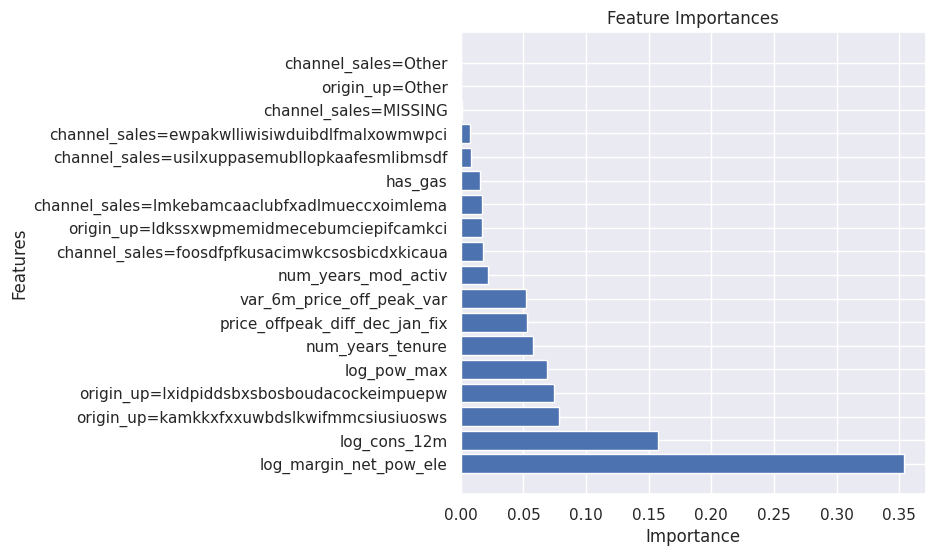

In [34]:
plt.figure(figsize=(6, 6))
plt.barh(feat_importance['feature'], feat_importance['importance'], color='b', align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

### 6.2 Feature importance using SHAP

In [35]:
import shap

In [36]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

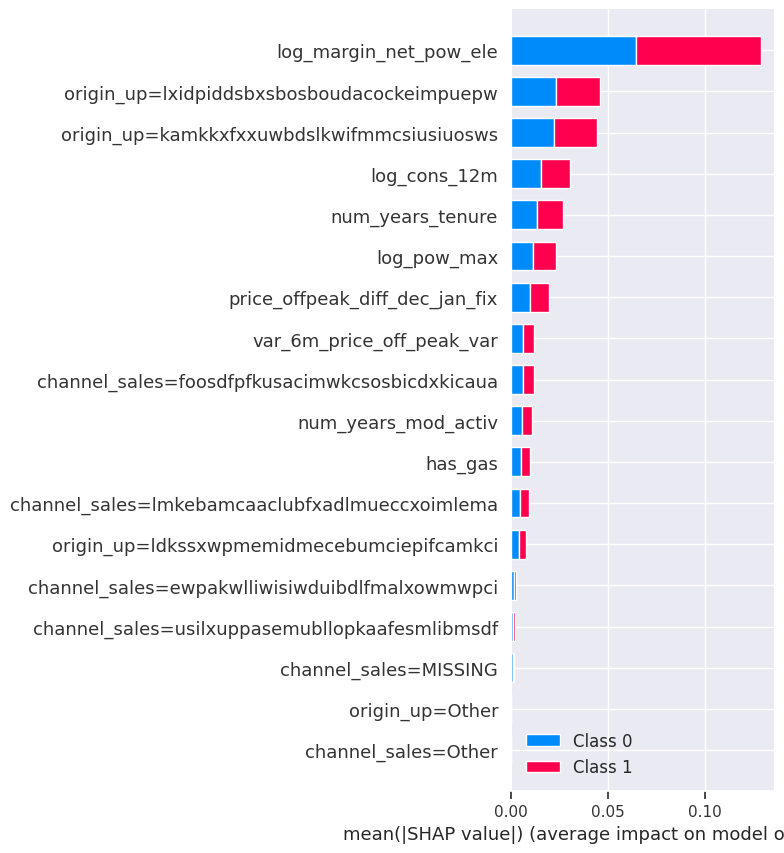

In [37]:
feature_names = dv.get_feature_names_out()
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

## 7. Training with XGBoost

In [38]:
import xgboost as xgb

In [39]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

In [40]:
# evals => List of validation sets for which metrics will evaluated during training
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [41]:
%%capture output
# saves evaluation logs as 'output'

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Print evaluation scores every 'verbose_eval' boosting stages
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [42]:
s = output.stdout

In [43]:
# Extract scores from 'output'
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [44]:
df_score = parse_xgb_output(output)
df_score.head(10)

,num_iter,train_auc,val_auc
0,0,0.71970,0.60704
1,5,0.81607,0.63362
2,10,0.85153,0.64625
3,15,0.87630,0.64362
4,20,0.90715,0.64178
5,25,0.93179,0.63855
6,30,0.94106,0.63937
7,35,0.95512,0.63991
8,40,0.96137,0.63374
9,45,0.96960,0.63111


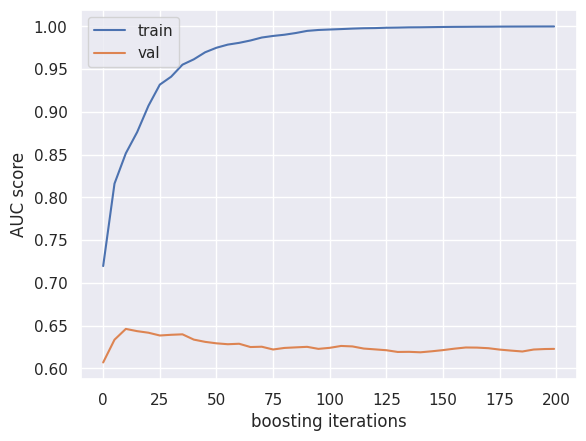

In [45]:
# Plot evaluation scores
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.xlabel("boosting iterations")
plt.ylabel("AUC score")
plt.legend()